In [1]:
import pandas as pd
import numpy as np
from numpy import random
import sklearn
from sklearn import metrics
import statsmodels.api as sm 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from random import randint

In [2]:
d = pd.read_csv('household.csv')

C:\Users\renat\AppData\Local\Temp\ipykernel_22332\1127986844.py:1: DtypeWarning: Columns (3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv('household.csv')


In [3]:
d['date_time'] = pd.to_datetime(d['Date'] + ' ' + d['Time'])

In [4]:
d= d.dropna()
print(d.isna().sum())


Unnamed: 0               0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
date_time                0
dtype: int64


In [5]:
d['date_time'] = pd.to_datetime(d['date_time']) 

In [6]:
print(d)
data = d
d = data

         Unnamed: 0        Date      Time Global_active_power  \
0                 0  16/12/2006  17:24:00               4.216   
1                 1  16/12/2006  17:25:00               5.360   
2                 2  16/12/2006  17:26:00               5.374   
3                 3  16/12/2006  17:27:00               5.388   
4                 4  16/12/2006  17:28:00               3.666   
...             ...         ...       ...                 ...   
2075254     2075254  26/11/2010  20:58:00               0.946   
2075255     2075255  26/11/2010  20:59:00               0.944   
2075256     2075256  26/11/2010  21:00:00               0.938   
2075257     2075257  26/11/2010  21:01:00               0.934   
2075258     2075258  26/11/2010  21:02:00               0.932   

        Global_reactive_power  Voltage Global_intensity Sub_metering_1  \
0                       0.418  234.840           18.400          0.000   
1                       0.436  233.630           23.000          0.000 

In [7]:
d['year'] = d['date_time'].apply(lambda x: x.year)
d['quarter'] = d['date_time'].apply(lambda x: x.quarter)
d['month'] = d['date_time'].apply(lambda x: x.month)
d['day'] = d['date_time'].apply(lambda x: x.day)


In [8]:
d = d.loc[:,['date_time','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3','year','quarter','month','day']]

In [9]:
d['Global_active_power'] = pd.to_numeric(d['Global_active_power'], errors='coerce')
d['Global_reactive_power'] = pd.to_numeric(d['Global_reactive_power'], errors='coerce')
d['Voltage'] = pd.to_numeric(d['Voltage'], errors='coerce')
d['Global_intensity'] = pd.to_numeric(d['Global_intensity'], errors='coerce')
d['Sub_metering_1'] = pd.to_numeric(d['Sub_metering_1'], errors='coerce')
d['Sub_metering_2'] = pd.to_numeric(d['Sub_metering_2'], errors='coerce')
d['Sub_metering_3'] = pd.to_numeric(d['Sub_metering_3'], errors='coerce')


In [10]:
d.sort_values('date_time', inplace=True, ascending=True)

In [11]:
d = d.reset_index(drop=True)

In [12]:
df = d
df = df.set_index('date_time')
df = df.resample('10min').mean(numeric_only=True)
df = df.dropna()
print(df.isna().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
quarter                  0
month                    0
day                      0
dtype: int64


In [13]:
eq1 = (df['Global_active_power']*10000/60)
eq2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] = eq1 - eq2
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,quarter,month,day,power_consumption
date_time,,,,,,,,,,,,
2006-12-16 17:20:00,4.587333,0.4840,234.366667,19.70,0.0,1.333333,16.833333,2006.0,4.0,12.0,16.0,746.388889
2006-12-16 17:30:00,4.252200,0.4608,234.208000,18.28,0.0,1.100000,16.800000,2006.0,4.0,12.0,16.0,690.800000
2006-12-16 17:40:00,4.721600,0.0308,234.845000,20.26,0.0,0.000000,16.900000,2006.0,4.0,12.0,16.0,770.033333
2006-12-16 17:50:00,3.476200,0.0424,235.045000,14.80,0.0,0.000000,16.900000,2006.0,4.0,12.0,16.0,562.466667
2006-12-16 18:00:00,4.690400,0.1526,234.975000,20.08,0.0,23.600000,16.900000,2006.0,4.0,12.0,16.0,741.233333


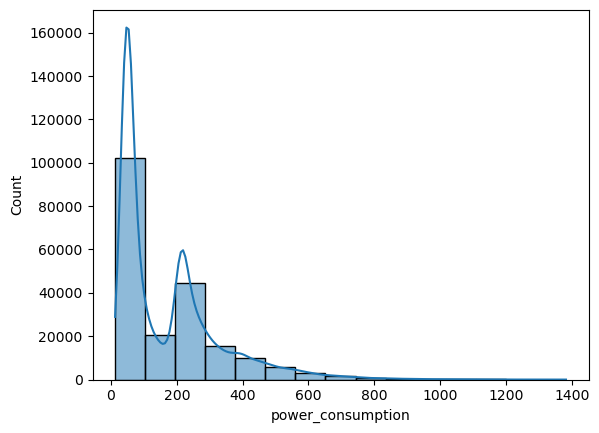

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='power_consumption', bins=15, kde=True)
plt.show()

In [15]:

#df.dropna(df)
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
quarter                  0
month                    0
day                      0
power_consumption        0
dtype: int64

In [16]:
Y = df['power_consumption']
X= df.drop('power_consumption',axis=1)
print(X)

                     Global_active_power  Global_reactive_power     Voltage  \
date_time                                                                     
2006-12-16 17:20:00             4.587333                 0.4840  234.366667   
2006-12-16 17:30:00             4.252200                 0.4608  234.208000   
2006-12-16 17:40:00             4.721600                 0.0308  234.845000   
2006-12-16 17:50:00             3.476200                 0.0424  235.045000   
2006-12-16 18:00:00             4.690400                 0.1526  234.975000   
...                                  ...                    ...         ...   
2010-12-11 23:10:00             0.386400                 0.0516  243.093000   
2010-12-11 23:20:00             0.961200                 0.0152  242.376000   
2010-12-11 23:30:00             0.744200                 0.0502  243.522000   
2010-12-11 23:40:00             0.689400                 0.0364  243.979000   
2010-12-11 23:50:00             0.690000            

In [23]:
X_train, X_test = train_test_split(X,
    test_size=0.2 ,random_state= 8)
y_train, y_test = train_test_split(Y,
    test_size=0.2, random_state= 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.15, random_state= 8) # 0.25 x 0.8 = 0.2


In [24]:
print(X_val)


                     Global_active_power  Global_reactive_power  Voltage  \
date_time                                                                  
2009-12-05 08:00:00               1.7348                 0.0540  238.734   
2008-07-17 06:20:00               0.2692                 0.1210  242.414   
2008-05-10 00:00:00               0.3400                 0.0954  241.004   
2010-10-21 05:30:00               1.4820                 0.0758  245.098   
2008-04-07 15:30:00               0.2700                 0.1648  240.282   
...                                  ...                    ...      ...   
2010-07-30 21:10:00               0.2900                 0.1510  239.967   
2009-01-21 06:30:00               2.0732                 0.0858  243.436   
2008-10-18 19:10:00               3.2118                 0.0320  229.994   
2009-05-19 12:10:00               1.5370                 0.0740  239.028   
2009-03-23 04:50:00               0.4322                 0.0504  242.159   

           

In [25]:
print(y_val)

date_time
2009-12-05 08:00:00    270.933333
2008-07-17 06:20:00     44.166667
2008-05-10 00:00:00     55.966667
2010-10-21 05:30:00    227.900000
2008-04-07 15:30:00     44.300000
                          ...    
2010-07-30 21:10:00     47.733333
2009-01-21 06:30:00    327.333333
2008-10-18 19:10:00    513.100000
2009-05-19 12:10:00    234.966667
2009-03-23 04:50:00     72.033333
Name: power_consumption, Length: 24594, dtype: float64


In [26]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
from sklearn.metrics import r2_score as r2
# ebm = ExplainableBoostingRegressor(max_bins=300, max_interaction_bins=40, 
#                                    interactions=100, validation_size=0.15, 
#                                    outer_bags=10, inner_bags=4, learning_rate=0.03, 
#                                    max_rounds=5000, early_stopping_rounds=50, 
#                                    early_stopping_tolerebm = ance=0.0001, min_samples_leaf=3, max_leaves=5)
ebm = ExplainableBoostingRegressor()
ebm.fit(X_train, y_train)

ExplainableBoostingRegressor()

In [27]:
valid_predict = ebm.predict(X_val)
test_predict = ebm.predict(X_test)
print('Model 1')
print('R2-score Validation',r2(y_val,valid_predict))

Model 1
R2-score Validation 0.9981335714120869


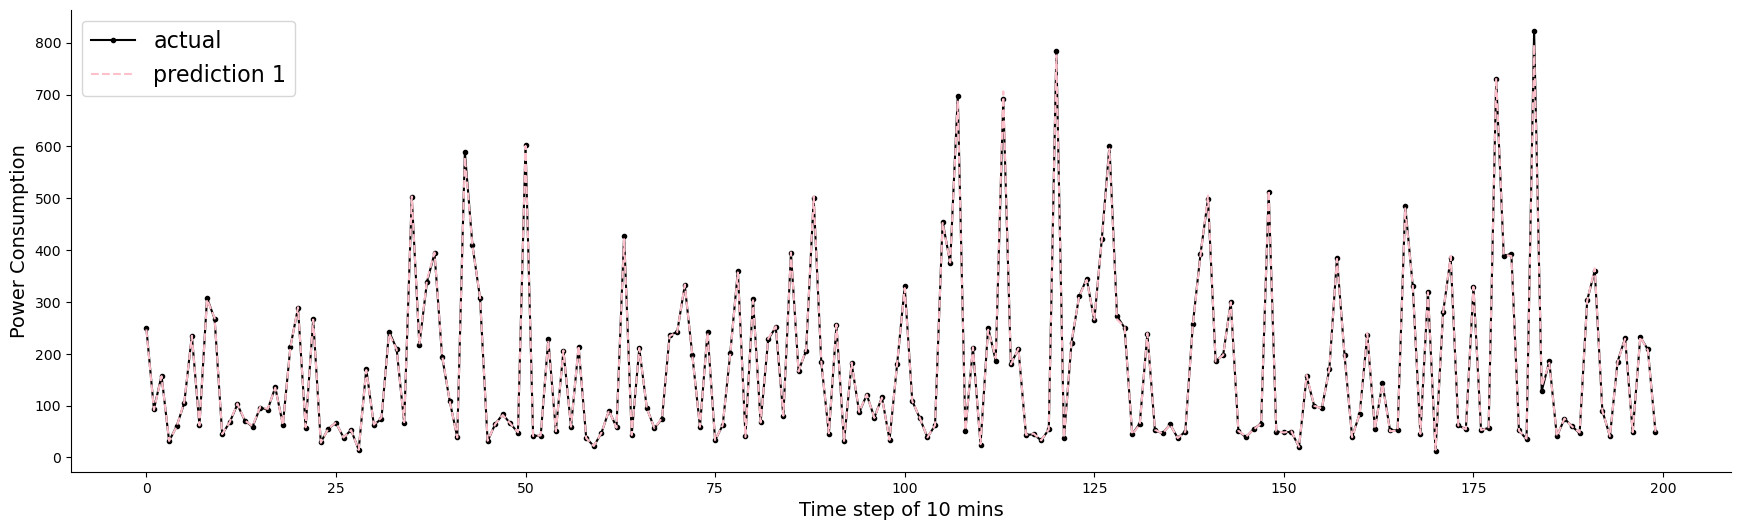

In [28]:
aa=[x for x in range(200)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, y_test[:200], marker='.', label="actual", color='black')

# Plotting the predicted values in green with a solid line
#plt.plot(aa, test_predict_1[:200], marker='.', label="Best prediction", color='black')
plt.plot(aa, test_predict[:200], '--', label="prediction 1", color='pink')
#plt.plot(aa, test_predict_2[:200], marker='.', label="prediction 2", color='yellow')
#plt.plot(aa, test_predict_3[:200], marker='.', label="prediction 3", color='green')
#plt.plot(aa, test_predict_4[:200], marker='.', label="prediction 4", color='gray')

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Power Consumption', size=14)

# Labeling the x-axis
plt.xlabel('Time step of 10 mins', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'interactions': range(0,20,2),
              'learning_rate':[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,1],
              'min_samples_leaf':[3,4,5,6,7,8,9,10,11,12],
              'max_leaves':[5,10,15,20,25,30,35,40,45,50]
             }


In [26]:
edm_search = GridSearchCV(ebm,param_grid, cv=5)


In [ ]:
edm_search.fit(X_train, y_train)

In [ ]:
dx= pd.DataFrame(edm_search.cv_results_)[['param_max_features','param_interactions','param_learning_rate','param_min_samples_leaf','param_max_leaves','mean_test_score']]
dx

In [ ]:
grid_reset = dx.groupby(['param_max_features', 'param_learning_rate']).mean().reset_index()
grid_reset.columns = ['param_max_features', 'param_learning_rate', 'mean_test_score']
grid_pivot = grid_reset.pivot('param_max_features', 'param_learning_rate')
grid_pivot

In [ ]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

import plotly.graph_objects as go

fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)] )

fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='learning_rate',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy_score'),
                  autosize=False,
                  width=650, height=650,
                  margin=dict(l=50, r=50, b=50, t=50))

fig.show()

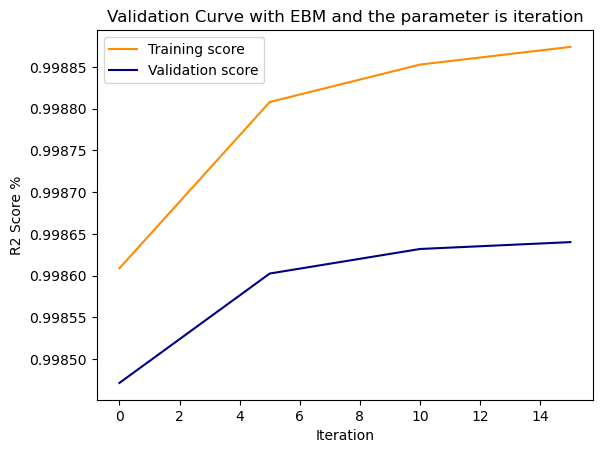

In [75]:
param_range = range(0,20,5)
train_scores, valid_scores = validation_curve(
    ebm, X_train, y_train, param_name="interactions", param_range=param_range,
    cv=5, scoring="r2", n_jobs=-1)

# Compute the mean and standard deviation of the training and validation scores
train_mean = (train_scores.mean(axis=1))
train_std = (train_scores.std(axis=1))
valid_mean = (valid_scores.mean(axis=1))
valid_std = (valid_scores.std(axis=1))

# Plot the training and validation scores as a function of the number of trees
plt.plot(param_range, train_mean, label="Training score", color="darkorange")
plt.plot(param_range, valid_mean, label="Validation score", color="navy")
plt.legend(loc="best")
plt.xlabel("Iteration")
plt.ylabel("R2 Score %")
plt.title("Validation Curve with EBM and the parameter is iteration")
plt.show()

In [90]:
param_range = range(0,20,5)
train_scores, valid_scores = -1*validation_curve(
    ebm, X_train, y_train, param_name="interactions", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

# Compute the mean and standard deviation of the training and validation scores
train_mean = train_scores
train_std = train_scores
valid_mean = valid_scores
valid_std = valid_scores

# Plot the training and validation scores as a function of the number of trees
plt.plot(param_range, train_mean, label="Training score", color="darkorange")
plt.plot(param_range, valid_mean, label="Validation score", color="navy")
plt.legend(loc="best")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Validation Curve with EBM and the pValueError: not enough values to unpack (expected 2, got 0)arameter is iteration")
plt.show()

ValueError: not enough values to unpack (expected 2, got 0)

In [76]:
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2032683167520/ -->

In [32]:
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local,0)

<!-- http://127.0.0.1:7001/2032354904144/ -->

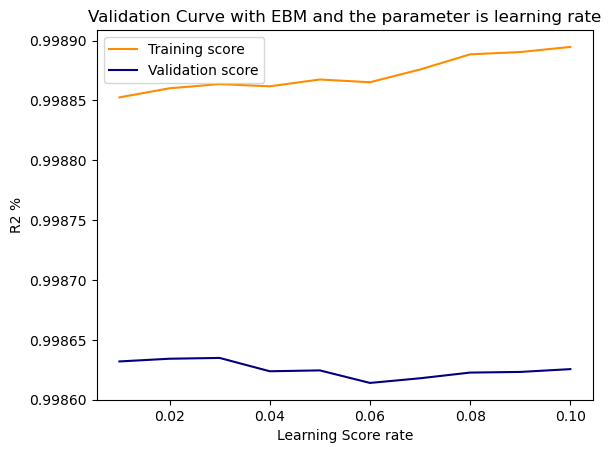

In [88]:
param_range = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
train_scores, valid_scores = validation_curve(
    ebm, X_train, y_train, param_name="learning_rate", param_range=param_range,
    cv=5, scoring="r2", n_jobs=-1)

# Compute the mean and standard deviation of the training and validation scores
train_mean = (train_scores.mean(axis=1))
train_std = (train_scores.std(axis=1))
valid_mean = (valid_scores.mean(axis=1))
valid_std = (valid_scores.std(axis=1))

# Plot the training and validation scores as a function of the number of trees
plt.plot(param_range, train_mean, label="Training score", color="darkorange")
plt.plot(param_range, valid_mean, label="Validation score", color="navy")
plt.legend(loc="best")
plt.xlabel("Learning Score rate")
plt.ylabel("R2 %")
plt.title("Validation Curve with EBM and the parameter is learning rate")
plt.show()

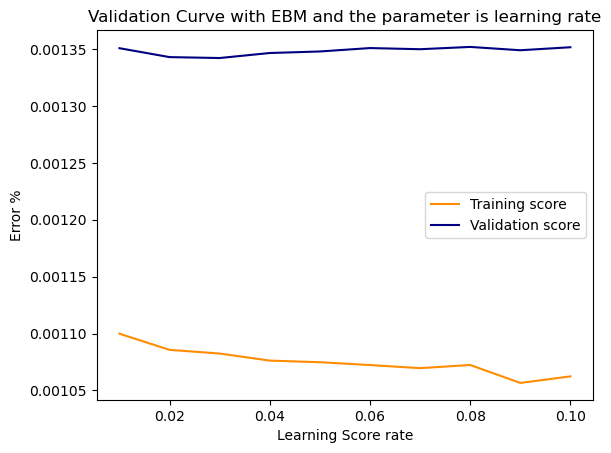

In [122]:
param_range = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
train_scores, valid_scores = validation_curve(
    ebm, X_train, y_train, param_name="learning_rate", param_range=param_range,
    cv=5, scoring="r2", n_jobs=-1)

# Compute the mean and standard deviation of the training and validation scores
train_mean = 1-(train_scores.mean(axis=1))
train_std = 1-(train_scores.std(axis=1))
valid_mean = 1-(valid_scores.mean(axis=1))
valid_std = 1-(valid_scores.std(axis=1))

# Plot the training and validation scores as a function of the number of trees
plt.plot(param_range, train_mean, label="Training score", color="darkorange")
plt.plot(param_range, valid_mean, label="Validation score", color="navy")
plt.legend(loc="best")
plt.xlabel("Learning Score rate")
plt.ylabel("Error %")
plt.title("Validation Curve with EBM and the parameter is learning rate")
plt.show()

In [64]:
plt.plot(param_range, train_mean, label="Training score", color="darkorange")
plt.plot(param_range, valid_mean, label="Validation score", color="navy")
plt.legend(loc="best")
plt.xlabel("max_leaves")
plt.ylabel("R2 score %")
plt.title("Validation Curve with EBM and the parameter is max_leaves")
plt.show()

SyntaxError: unmatched ')' (2484959118.py, line 1)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
lr_valid_predict = lr.predict(X_val)
lr_test_predict = lr.predict(X_test)
print('Model 1')
print('R2-score Validation',r2(y_val,lr_valid_predict))
print('R2-score Testing',r2(y_test,lr_test_predict))

Model 1
R2-score Validation 1.0
R2-score Testing 1.0


TypeError: validation_curve() missing 2 required keyword-only arguments: 'param_name' and 'param_range'

In [49]:
y_test.shape

(40990,)

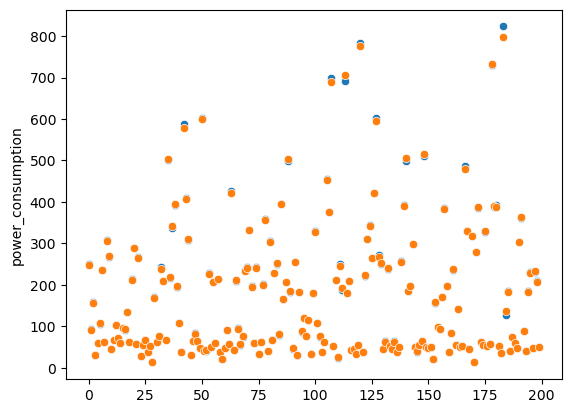

In [61]:
aa=[x for x in range(200)]
sns.scatterplot(x=aa, y=y_test[:200])
sns.scatterplot(x=aa, y=test_predict[:200])
plt.show()

C:\Users\renat\AppData\Local\Temp\ipykernel_22332\946316314.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\renat\AppData\Local\Temp\ipykernel_22332\946316314.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




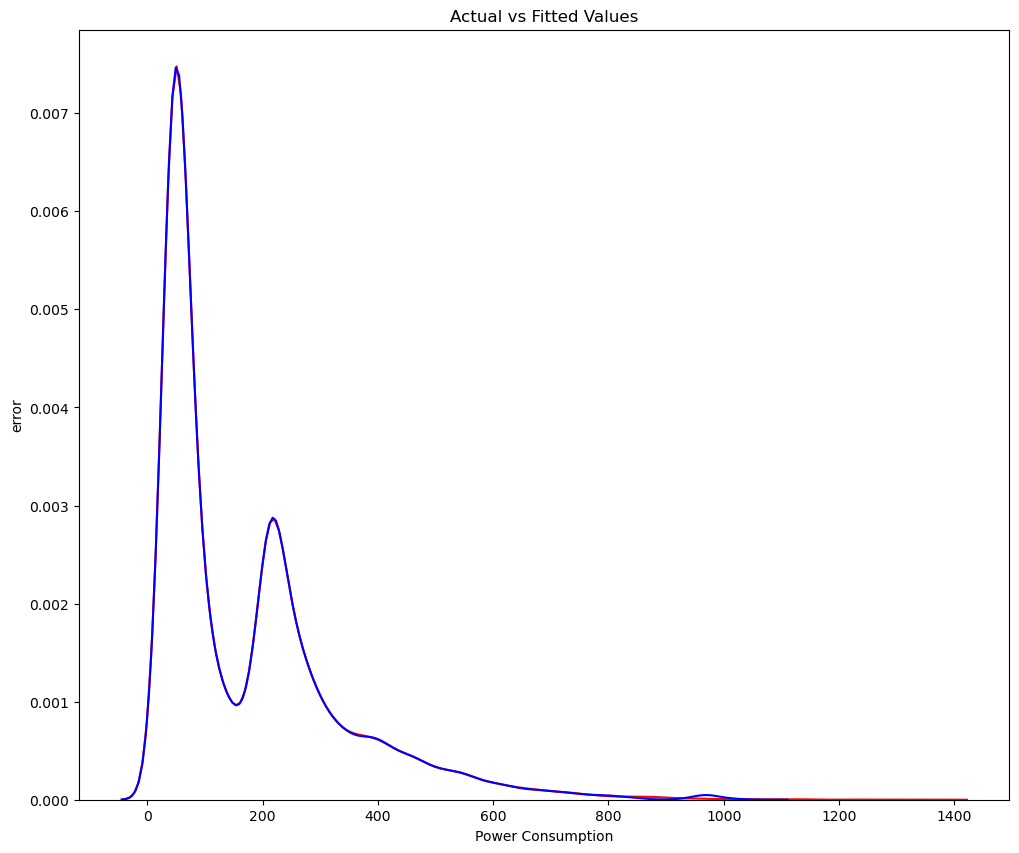

In [69]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(test_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values')
plt.xlabel('Power Consumption')
plt.ylabel('error')

plt.show()
plt.close()

In [72]:
import scipy.stats as stats
stat, p = stats.normaltest(y_train)

# Print the results
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Set the significance level
alpha = 0.05

# Make a decision on the test result
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(y_train)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(y_train)))

Statistics=41454.291, p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of normal distribution: 3.1150162161644426
Skewness of normal distribution: 1.5925128838200175


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [77]:
regr_valid_predict = regr.predict(X_val)
regr_test_predict = regr.predict(X_test)
print('Model 1')
print('R2-score Validation',r2(y_val,regr_valid_predict))
print('R2-score Testing',r2(y_test,regr_test_predict))

Model 1
R2-score Validation 0.9999355137062805
R2-score Testing 0.9999210091907439


In [ ]:
fig= plt.figure()
axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(x,y)
sns.set_style('darkgrid')
x1 = ['Boost', 'Bagging']
y1 = [metrics.auc(fpr_g, tpr_g), metrics.auc(fpr_b, tpr_b)]

sns.barplot(x=y1,y=x1, width = 0.5)
axes.set_title('Out of Bounds')
plt.show()

In [103]:
X=X.drop('Sub_metering_1', axis=1)
X_train, X_test = train_test_split(X,
    test_size=0.2 ,random_state= 8)
y_train, y_test = train_test_split(Y,
    test_size=0.2, random_state= 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.15, random_state= 8) # 0.25 x 0.8 = 0.2

In [104]:
print(X_train)

                     Global_active_power  Global_reactive_power  Voltage  \
date_time                                                                  
2010-09-19 03:10:00               0.5128                 0.1214  241.611   
2008-01-27 16:50:00               3.3964                 0.0138  239.020   
2010-02-28 22:30:00               0.2460                 0.0000  244.196   
2009-01-25 11:40:00               1.4426                 0.0222  241.236   
2008-08-07 03:20:00               0.1416                 0.0000  240.999   
...                                  ...                    ...      ...   
2010-01-19 08:20:00               1.4132                 0.0686  238.782   
2007-02-28 17:10:00               0.2222                 0.0000  244.173   
2008-05-23 07:50:00               1.8238                 0.3124  238.927   
2007-06-25 21:10:00               1.9526                 0.2738  238.423   
2008-05-06 01:20:00               0.3352                 0.1784  237.277   

           

In [105]:
ebm = ExplainableBoostingRegressor(interactions=20, learning_rate=0.03)
ebm.fit(X_train, y_train)

ExplainableBoostingRegressor(interactions=20, learning_rate=0.03)

In [106]:
valid_predict = ebm.predict(X_val)
test_predict = ebm.predict(X_test)
print('Model 1')
print('R2-score Validation',r2(y_val,valid_predict))
print('R2-score Test',r2(y_test,test_predict))

Model 1
R2-score Validation 0.9976036017249641
R2-score Test 0.9976036017249641


In [107]:
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2032638458848/ -->

In [108]:
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local,0)

<!-- http://127.0.0.1:7001/2034836648480/ -->

In [113]:
Y = df['power_consumption']
X= df.drop('power_consumption',,axis=1)

In [114]:
X_train, X_test = train_test_split(X,
    test_size=0.2 ,random_state= 8)
y_train, y_test = train_test_split(Y,
    test_size=0.2, random_state= 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.15, random_state= 8) # 0.25 x 0.8 = 0.2

In [115]:
ebm = ExplainableBoostingRegressor(interactions=20, learning_rate=0.03)
ebm.fit(X_train, y_train)

ExplainableBoostingRegressor(interactions=20, learning_rate=0.03)

In [116]:
valid_predict = ebm.predict(X_val)
test_predict = ebm.predict(X_test)
print('Model 1')
print('R2-score Validation',r2(y_val,valid_predict))
print('R2-score Test',r2(y_test,test_predict))

Model 1
R2-score Validation 0.9981836016347945
R2-score Test 0.9980904946231764


In [117]:
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2034837681488/ -->

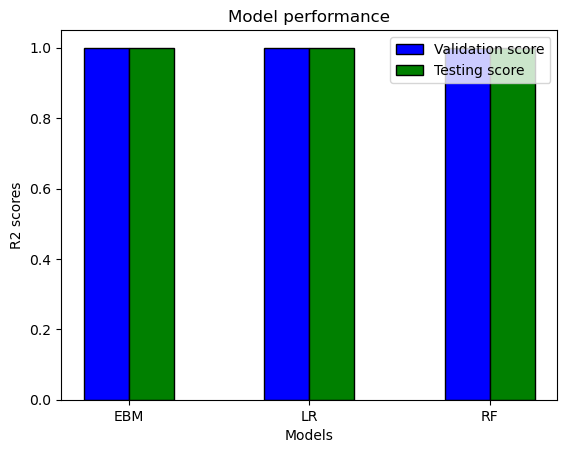

In [118]:
validation_s = [r2(y_val,valid_predict),r2(y_val,lr_valid_predict),r2(y_val,regr_valid_predict)]
testing_s = [r2(y_test,test_predict),r2(y_test,lr_test_predict),r2(y_test,regr_test_predict)]
  
n=3
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, validation_s, color = 'b',
        width = width, edgecolor = 'black',
        label='Validation score')
plt.bar(r + width, testing_s, color = 'g',
        width = width, edgecolor = 'black',
        label='Testing score')
  
plt.xlabel("Models")
plt.ylabel("R2 scores")
plt.title("Model performance")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['EBM','LR','RF'])
plt.legend()
  
plt.show()

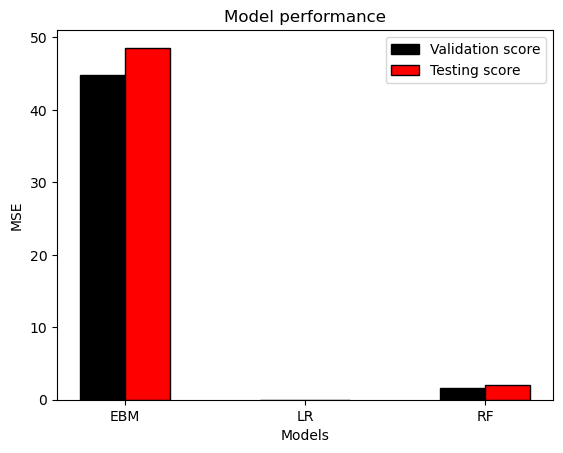

In [119]:
validation_mse = [mse(y_val,valid_predict),mse(y_val,lr_valid_predict),mse(y_val,regr_valid_predict)]
testing_mse = [mse(y_test,test_predict),mse(y_test,lr_test_predict),mse(y_test,regr_test_predict)]
  
n=3
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, validation_mse, color = 'black',
        width = width, edgecolor = 'black',
        label='Validation score')
plt.bar(r + width, testing_mse, color = 'Red',
        width = width, edgecolor = 'black',
        label='Testing score')
  
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("Model performance")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['EBM','LR','RF'])
plt.legend()
  
plt.show()

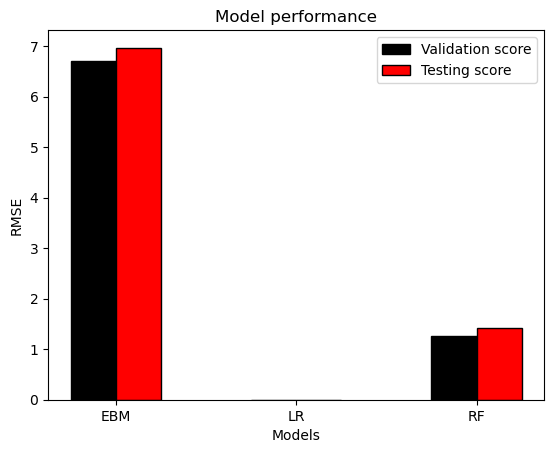

In [120]:
validation_mse = [mse(y_val,valid_predict)**(1/2),mse(y_val,lr_valid_predict)**(1/2),mse(y_val,regr_valid_predict)**(1/2)]
testing_mse = [mse(y_test,test_predict)**(1/2),mse(y_test,lr_test_predict)**(1/2),mse(y_test,regr_test_predict)**(1/2)]
  
n=3
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, validation_mse, color = 'black',
        width = width, edgecolor = 'black',
        label='Validation score')
plt.bar(r + width, testing_mse, color = 'Red',
        width = width, edgecolor = 'black',
        label='Testing score')
  
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Model performance")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['EBM','LR','RF'])
plt.legend()
  
plt.show()

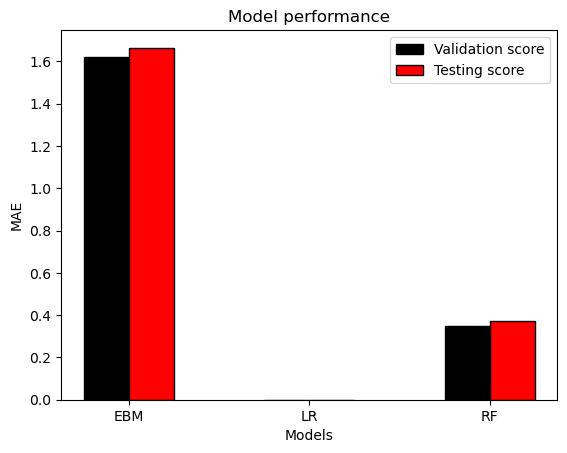

In [121]:
from sklearn.metrics import mean_absolute_error as mae
validation_mse = [mae(y_val,valid_predict),mae(y_val,lr_valid_predict),mae(y_val,regr_valid_predict)]
testing_mse = [mae(y_test,test_predict),mae(y_test,lr_test_predict),mae(y_test,regr_test_predict)]
  
n=3
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, validation_mse, color = 'black',
        width = width, edgecolor = 'black',
        label='Validation score')
plt.bar(r + width, testing_mse, color = 'Red',
        width = width, edgecolor = 'black',
        label='Testing score')
  
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("Model performance")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['EBM','LR','RF'])
plt.legend()
  
plt.show()